In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 100 #high res figures
import graphviz #to visualize decision trees


In [3]:
pip install graphviz

  Using cached graphviz-0.14.1-py2.py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
#cleaning the dataset
df_orig = pd.read_excel('default_of_credit_card_clients.xls')

In [3]:
pip install xlrd

  Using cached xlrd-1.2.0-py2.py3-none-any.whl (103 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
#As a first step, we identify and drop any samples where the values of all the features are equal to 0. We had determined that this was an effective way to remove duplicate account IDs from the dataset.

In [6]:
df_orig

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [8]:
#Make a Boolean array indicating where entries of the DataFrame are equal to 0
#in the entire dataset where and all zero is there it will show true
df_zero_mask = df_orig == 0

In [9]:
df_zero_mask

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [13]:
#Collapse this 2-dimensional Boolean array to 1 dimension by indicating which rows have 0s in all columns, starting with the second column. This array tells which rows have a value of 0 for all the features and need to be removed
#this below line tells which row have zero for all the features
#except the id column(coz it is unique column)
#axis=1 is for column
#all function return true if only the values are true 
#here we are finding which rows have zero for all the column so we are using axis=1(for column)
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
feature_zero_mask

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [14]:
#total true value in feature_zero_mask is 315
#sum function returns the sum of true value
#we need to remove those rows with true value in the feature_zero_mask
sum(feature_zero_mask)
# 315

315

In [15]:
#
#Remove all the rows with all zero features and response, confirm this that gets rid of the duplicate IDs.

In [20]:
#Use this mask to select all the other rows, that is, those that don't have values of zero for all features, and check the shape of the resulting DataFrame
#from the dataframe we have all the rows whaich 
#~covverts false into true and true into false 
#now it selects only the values which are true which is being inversed and make a copy of it in df_clean
df_clean = df_orig.loc[~feature_zero_mask,:].copy()

In [21]:
df_clean

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [23]:
#rows with complete 0 are being removed
df_clean.shape

(29685, 25)

In [24]:
#to check wether all the values are unique
df_clean['ID'].nunique()
# 29685

29685

In [25]:
#grouping by counting the values that belong to each category in education field
df_clean['EDUCATION'].value_counts()
# 2    13884
# 1    10474
# 3     4867
# 5      275
# 4      122
# 6       49
# 0       14
# Name: EDUCATION, dtype: int64

2    13884
1    10474
3     4867
5      275
4      122
6       49
0       14
Name: EDUCATION, dtype: int64

In [26]:
#"Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)"

In [27]:
#Replace the undocumented values of EDUCATION and MARRIAGE features with the documented value for "unknown." We simply repeat the code from Data Exploration and Cleaning that does this

In [28]:
#in education column only the values 1,2,3 have meaning so apert from it others cane be replaced with value=4
#indicating that 4=others
df_clean['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)

In [29]:
#now the category will be 1,2,3,4
df_clean['EDUCATION'].value_counts()
# 2    13884
# 1    10474
# 3     4867
# 4      460
# Name: EDUCATION, dtype: int64

2    13884
1    10474
3     4867
4      460
Name: EDUCATION, dtype: int64

In [30]:
#same thing with marriage feature

In [31]:
df_clean['MARRIAGE'].value_counts()
# 2    15810
# 1    13503
# 3      318
# 0       54
# Name: MARRIAGE, dtype: int64

2    15810
1    13503
3      318
0       54
Name: MARRIAGE, dtype: int64

In [32]:
#Should only be (1 = married; 2 = single; 3 = others).
df_clean['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)

In [33]:
df_clean['MARRIAGE'].value_counts()
# 2    15810
# 1    13503
# 3      372
# Name: MARRIAGE, dtype: int64

2    15810
1    13503
3      372
Name: MARRIAGE, dtype: int64

In [34]:
#n order to do this, we will subset the samples from our cleaned dataset df_clean that have missing values for PAY_1 and add them to the training and testing sets later, so that the proportion of training and testing data remains the same

In [36]:
#recalling the various categories in pay_1
df_clean['PAY_1'].value_counts()
# 0                13087
# -1                5047
# 1                 3261
# Not available     3021
# -2                2476
# 2                 2378
# 3                  292
# 4                   63
# 5                   23
# 8                   17
# 6                   11
# 7                    9
#

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [37]:
#The missing values in PAY_1 are indicated by the string 'Not available'.
#so trying to remove this
missing_pay_1_mask = df_clean['PAY_1'] == 'Not available'

In [38]:
#sum up the total no of values which are missing("indicated by not available")

In [39]:
sum(missing_pay_1_mask)
# 3021

3021

In [41]:
#make a copy of the rows with pay_1 as not availaable
df_missing_pay_1 = df_clean.loc[missing_pay_1_mask,:].copy()
df_missing_pay_1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
17,f0ba5e02-0c0f,320000,1,1,1,49,Not available,0,0,-1,...,70074,5856,195599,10358,10000,75940,20000,195599,50000,0
28,aecb449b-a999,50000,2,3,1,47,Not available,-1,-1,-1,...,2040,30430,257,3415,3421,2044,30430,257,0,0
29,57ea9a1f-cdd5,50000,1,1,2,26,Not available,0,0,0,...,17907,18375,11400,1500,1500,1000,1000,1600,0,0
54,781f3cc2-7ddc,150000,2,1,2,29,Not available,0,0,0,...,26518,21042,16540,1600,1718,1049,1500,2000,5000,0
60,5c00d7e6-a804,500000,2,3,1,28,Not available,0,0,0,...,14937,13827,15571,1516,1300,1000,1000,2000,2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29949,4b490335-91ab,280000,1,1,1,39,Not available,0,0,0,...,40939,44290,70573,1652,2144,1666,5015,32013,12,0
29956,b4a99d86-3bdd,150000,1,1,2,30,Not available,0,0,-1,...,1610,1180,2980,2000,2000,2000,1000,3000,0,0
29967,f411fbb3-adaf,50000,1,2,1,32,Not available,0,0,-1,...,50551,40590,39384,2686,0,50551,0,1600,1500,0
29973,31c0c152-e5ac,230000,1,2,1,35,Not available,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1


In [42]:
df_missing_pay_1.shape

(3021, 25)

In [43]:
df_missing_pay_1['PAY_1'].head(3)

17    Not available
28    Not available
29    Not available
Name: PAY_1, dtype: object

In [44]:
df_missing_pay_1['PAY_1'].value_counts()

Not available    3021
Name: PAY_1, dtype: int64

In [45]:
df_missing_pay_1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [46]:
df = pd.read_csv('cleaned_data.csv')

In [47]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [48]:
#converting the columns in the form of list
features_response = df.columns.tolist()

In [49]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [50]:
#to have the features apart from those in the items_to_remove
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [51]:
#Mode and Random Imputation of PAY_

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values, df['default payment next month'].values,
test_size=0.2, random_state=24)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# (21331, 17)
# (5333, 17)
# (21331,)
# (5333,)

(21331, 17)
(5333, 17)
(21331,)
(5333,)


In [55]:
df_missing_pay_1.shape


(3021, 25)

In [56]:
features_response[4]

'PAY_1'

In [57]:
np.median(X_train[:,4])

0.0

In [59]:
#create a random value to test for imputation
np.random.seed(seed=1)
fill_values = [0, np.random.choice(X_train[:,4], size=(3021,), replace=True)]

In [60]:
fill_values

[0, array([ 0,  0,  0, ...,  2,  0, -2])]

In [61]:
#these are the strategies that we are going to use for the imputation

In [62]:
fill_strategy = ['mode', 'random']

In [63]:
fill_values[-1]

array([ 0,  0,  0, ...,  2,  0, -2])

In [64]:
#Use histograms to examine the distributions of the original non-missing PAY_1 feature in the training set and the randomly selected imputed values:

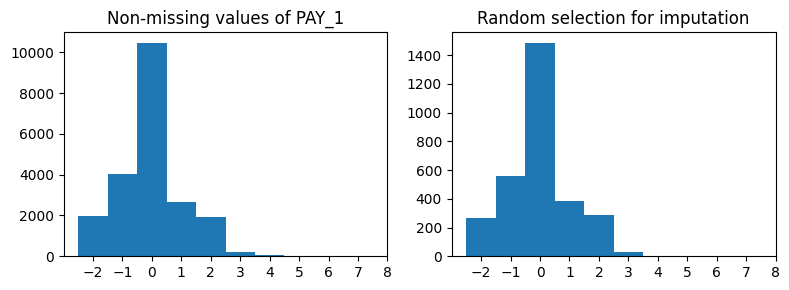

In [65]:
#histogram between non missing values of PAY_1
#AND non missing values of random selection
fig, axs = plt.subplots(1,2, figsize=(8,3))
bin_edges = np.arange(-2,9)
axs[0].hist(X_train[:,4], bins=bin_edges, align='left')
axs[0].set_xticks(bin_edges)
axs[0].set_title('Non-missing values of PAY_1')
axs[1].hist(fill_values[-1], bins=bin_edges, align='left')
axs[1].set_xticks(bin_edges)
axs[1].set_title('Random selection for imputation')
plt.tight_layout()

In [66]:
#To do cross-validation on the training set, now we need to shuffle since all the samples with missing PAY_1 were concatenated on to the end.

In [67]:
#performing cross-validation
from sklearn.model_selection import KFold

In [68]:
k_folds = KFold(n_splits=4, shuffle=True, random_state=1)

In [69]:
from sklearn.model_selection import cross_validate

In [70]:
#set the optimal parameters decided in the previous session

In [71]:
#random forest classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf = RandomForestClassifier\
(n_estimators=200, criterion='gini', max_depth=9,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
random_state=4, verbose=1, warm_start=False, class_weight=None)

In [76]:
#this loop will work for the different imputation strategies
#Here, we have specified to use four folds over the training set, as we have done previously when doing cross-validation. We also say that we would like to shuffle the data before splitting in to folds. This is important because we will append the samples with imputed values to the end of the training features and response arrays. However, when we perform cross-validation, we'd like these samples to be "mixed up" throughout the four folds so that each fold has some imputed values in it. We also set the random seed for repeatability.
#Inside the for loop, the first step is to create a copy of the DataFrame we have of samples with missing values of PAY_1 and then fill in these missing values with the imputation strategy under consideration
#inside the loop each missing value of pay_1 is replaced with imputation value
#Split the imputed data in to training and testing sets. We are only going to use the training portion here, for the cross-validation.
#Now, we want to combine the imputed data with the non-missing PAY_1 data that we've been working with
#Finally, we put everything together. We use this data with the cross_validation procedure, as well as with the KFolds s
for counter in range(len(fill_values)):
    #Copy the data frame with missing PAY_1 and assign imputed values
    df_fill_pay_1_filled = df_missing_pay_1.copy()
    df_fill_pay_1_filled['PAY_1'] = fill_values[counter]
    
    #Split imputed data in to training and testing, using the same
    #80/20 split we have used for the data with non-missing PAY_1
    X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
    train_test_split(
        df_fill_pay_1_filled[features_response[:-1]].values,
        df_fill_pay_1_filled['default payment next month'].values,
    test_size=0.2, random_state=24)
    
    #Concatenate the imputed data with the array of non-missing data
    X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
    y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)
    
    #Use the KFolds splitter and the random forest model to get
    #4-fold cross-validation scores for both imputation methods
    imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
                                       cv=k_folds, n_jobs=-1, verbose=1,
                                       return_train_score=True, return_estimator=True,
                                       error_score='raise-deprecating')
    
    test_score = imputation_compare_cv['test_score']
    print(fill_strategy[counter] + ' imputation: ' +
          'mean testing score ' + str(np.mean(test_score)) +
          ', std ' + str(np.std(test_score)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   14.3s remaining:   14.3s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   14.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


mode imputation: mean testing score 0.772866246168149, std 0.0031479941297533737


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   14.2s remaining:   14.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   14.3s finished


random imputation: mean testing score 0.7692540439833129, std 0.003660875187678248


In [75]:
#Here, we have specified to use four folds over the training set, as we have done previously when doing cross-validation. We also say that we would like to shuffle the data before splitting in to folds. This is important because we will append the samples with imputed values to the end of the training features and response arrays. However, when we perform cross-validation, we'd like these samples to be "mixed up" throughout the four folds so that each fold has some imputed values in it. We also set the random seed for repeatability.

In [77]:
#A Predictive Model for PAY_1

In [78]:
pay_1_df = df.copy()

In [79]:
features_for_imputation = pay_1_df.columns.tolist()

In [80]:
items_to_remove_2 = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university', 'default payment next month', 'PAY_1']

In [81]:
features_for_imputation = [item for item in features_for_imputation if item not in items_to_remove_2]
features_for_imputation

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [83]:
#building multiclass model for imputation(we are using the random forest model)

In [84]:
X_impute_train, X_impute_test, y_impute_train, y_impute_test = \
train_test_split(
    pay_1_df[features_for_imputation].values,
    pay_1_df['PAY_1'].values,
test_size=0.2, random_state=24)

In [85]:
rf_impute_params = {'max_depth':[3, 6, 9, 12],
             'n_estimators':[10, 50, 100, 200]}

In [86]:
from sklearn.model_selection import GridSearchCV
#gridsearch

In [87]:
cv_rf_impute = GridSearchCV(rf, param_grid=rf_impute_params, scoring='accuracy',
                            n_jobs=-1, iid=False, refit=True,
                            cv=4, verbose=2, error_score=np.nan, return_train_score=True)

In [88]:
cv_rf_impute.fit(X_impute_train, y_impute_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  1.9min finished
/home/red/my_project1_dir/my_project1_env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   15.9s finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=9, n_estimators=200,
                                              random_state=4, verbose=1),
             iid=False, n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 12],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [89]:
#best selected features
impute_df = pd.DataFrame(cv_rf_impute.cv_results_)
impute_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.434826,0.043488,0.033879,0.005819,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.664729,0.669417,0.671479,0.664291,0.667479,0.003061,15,0.669396,0.670146,0.665146,0.670042,0.668682,0.002062
1,1.650772,0.044014,0.080230,0.010739,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.657979,0.660229,0.660604,0.651350,0.657540,0.003712,16,0.664521,0.657145,0.654082,0.660854,0.659150,0.003920
2,2.999111,0.137710,0.161658,0.028320,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.672605,0.673542,0.675792,0.667854,0.672448,0.002894,13,0.677835,0.675147,0.670521,0.676167,0.674918,0.002713
3,5.690499,0.117351,0.357353,0.089038,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.664917,0.666042,0.675792,0.666354,0.668276,0.004372,14,0.672334,0.668896,0.669021,0.672605,0.670714,0.001758
4,0.640272,0.103987,0.018970,0.002961,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.710294,0.706919,0.713482,0.700675,0.707843,0.004744,12,0.717027,0.717027,0.718465,0.711607,0.716032,0.002621
5,2.923907,0.147265,0.090507,0.042819,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.708419,0.709732,0.713107,0.703863,0.708780,0.003314,11,0.716652,0.716090,0.719777,0.715982,0.717125,0.001552
6,5.053856,0.204695,0.185672,0.024925,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.709544,0.709544,0.714420,0.705926,0.709859,0.003019,10,0.718777,0.716777,0.719152,0.718420,0.718282,0.000906
7,10.997155,0.445118,0.320094,0.041955,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.710669,0.709357,0.715170,0.705551,0.710187,0.003436,9,0.719152,0.717652,0.719715,0.718107,0.718657,0.000818
8,0.792834,0.047135,0.026147,0.005052,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.719670,0.725858,0.721920,0.720743,0.722048,0.002339,7,0.767721,0.773722,0.767221,0.771611,0.770069,0.002709
9,3.257060,0.111352,0.085525,0.007895,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.726608,0.728296,0.725858,0.731808,0.728142,0.002293,6,0.770284,0.774347,0.771471,0.770611,0.771678,0.001601


In [90]:
cv_rf_impute.best_params_
# {'max_depth': 12, 'n_estimators': 100}

{'max_depth': 12, 'n_estimators': 200}

In [91]:
cv_rf_impute.best_score_
# 0.7337676389523727

0.7344242187492307

In [94]:
pay_1_value_counts = pay_1_df['PAY_1'].value_counts().sort_index()

In [95]:
pay_1_value_counts

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

In [96]:
y_impute_predict = cv_rf_impute.predict(X_impute_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.3s finished


In [97]:
from sklearn import metrics

In [98]:
metrics.accuracy_score(y_impute_test, y_impute_predict)

0.7391711981998875

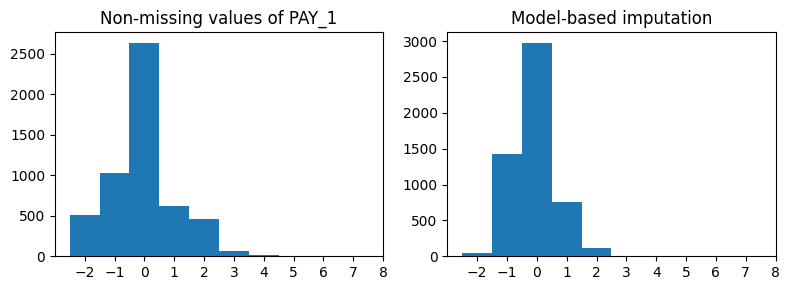

In [99]:
fig, axs = plt.subplots(1,2, figsize=(8,3))
axs[0].hist(y_impute_test, bins=bin_edges, align='left')
axs[0].set_xticks(bin_edges)
axs[0].set_title('Non-missing values of PAY_1')
axs[1].hist(y_impute_predict, bins=bin_edges, align='left')
axs[1].set_xticks(bin_edges)
axs[1].set_title('Model-based imputation')
plt.tight_layout()


In [101]:
X_impute_all = pay_1_df[features_for_imputation].values
y_impute_all = pay_1_df['PAY_1'].valuesX_impute_all = pay_1_df[features_for_imputation].values
y_impute_all = pay_1_df['PAY_1'].values

In [102]:
rf_impute = RandomForestClassifier(n_estimators=100, max_depth=12)

In [103]:
rf_impute

RandomForestClassifier(max_depth=12)

In [104]:
rf_impute.fit(X_impute_all, y_impute_all)

RandomForestClassifier(max_depth=12)

In [105]:
#using comparison methods and comparing it with other methods

In [106]:
df_fill_pay_1_model = df_missing_pay_1.copy()

In [107]:
df_fill_pay_1_model['PAY_1'].head()

17    Not available
28    Not available
29    Not available
54    Not available
60    Not available
Name: PAY_1, dtype: object

In [108]:
df_fill_pay_1_model['PAY_1'] = rf_impute.predict(df_fill_pay_1_model[features_for_imputation].values)

In [109]:
df_fill_pay_1_model['PAY_1'].head()

17    0
28   -1
29    0
54    0
60    0
Name: PAY_1, dtype: int64

In [110]:
df_fill_pay_1_model['PAY_1'].value_counts().sort_index()

-2      30
-1     763
 0    1715
 1     438
 2      64
 3       7
 4       2
 6       1
 8       1
Name: PAY_1, dtype: int64

In [111]:
X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
train_test_split(
    df_fill_pay_1_model[features_response[:-1]].values,
    df_fill_pay_1_model['default payment next month'].values,
test_size=0.2, random_state=24)


In [112]:
print(X_fill_pay_1_train.shape)
print(X_fill_pay_1_test.shape)
print(y_fill_pay_1_train.shape)
print(y_fill_pay_1_test.shape)

(2416, 17)
(605, 17)
(2416,)
(605,)


In [113]:
X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)

In [114]:
print(X_train_all.shape)
print(y_train_all.shape)

(23747, 17)
(23747,)


In [115]:
rf

RandomForestClassifier(max_depth=9, n_estimators=200, random_state=4, verbose=1)

In [116]:
imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
                                       cv=k_folds, n_jobs=-1, verbose=1,
                                       return_train_score=True, return_estimator=True,
                                       error_score='raise-deprecating')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   24.8s remaining:   24.8s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   25.2s finished


In [117]:
imputation_compare_cv['test_score']
# array([0.76890992, 0.77309591, 0.77166336, 0.77703366])

array([0.76890992, 0.77309591, 0.77166336, 0.77703366])

In [118]:
np.mean(imputation_compare_cv['test_score'])
# 0.7726757126815554

0.7726757126815554

In [119]:
np.std(imputation_compare_cv['test_score'])
# 0.002931480680760725

0.002931480680760725

In [120]:
#reassigning the values for imputation using mode


In [121]:
df_fill_pay_1_model['PAY_1'] = np.zeros_like(df_fill_pay_1_model['PAY_1'].values)

In [122]:
df_fill_pay_1_model['PAY_1'].unique()

array([0])

In [123]:
X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
train_test_split(
    df_fill_pay_1_model[features_response[:-1]].values,
    df_fill_pay_1_model['default payment next month'].values,
test_size=0.2, random_state=24)

In [124]:
X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
X_test_all = np.concatenate((X_test, X_fill_pay_1_test), axis=0)
y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)
y_test_all = np.concatenate((y_test, y_fill_pay_1_test), axis=0)


In [125]:
print(X_train_all.shape)
print(X_test_all.shape)
print(y_train_all.shape)
print(y_test_all.shape)


(23747, 17)
(5938, 17)
(23747,)
(5938,)


In [126]:
imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
                                       cv=k_folds, n_jobs=-1, verbose=1,
                                       return_train_score=True, return_estimator=True,
                                       error_score='raise-deprecating')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   15.9s remaining:   15.9s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   16.4s finished


In [127]:
imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
                                       cv=k_folds, n_jobs=-1, verbose=1,
                                       return_train_score=True, return_estimator=True,
                                       error_score='raise-deprecating')
#comparing both the techniaue of imputation mode and random

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   15.9s remaining:   15.9s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   16.2s finished


In [128]:
rf.fit(X_train_all, y_train_all)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   12.0s finished


RandomForestClassifier(max_depth=9, n_estimators=200, random_state=4, verbose=1)

In [129]:
y_test_all_predict_proba = rf.predict_proba(X_test_all)
#finfing with probability and then finding auc_score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


In [130]:
from sklearn.metrics import roc_auc_score

In [131]:
roc_auc_score(y_test_all, y_test_all_predict_proba[:,1])
# 0.7696243835824927

0.7696243835824927

In [132]:
#characterizing cost and saving

In [134]:
thresholds = np.linspace(0, 1, 101)

In [135]:
#Use mean bill amount to estimate savings per prevented default

In [136]:
df[features_response[:-1]].columns[5]

'BILL_AMT1'

In [137]:
savings_per_default = np.mean(X_test_all[:, 5])
savings_per_default
# 51601.7433479286

51601.7433479286

In [138]:
cost_per_counseling = 7500

In [139]:
cost_per_counseling = 7500

In [142]:
effectiveness = 0.70

In [140]:
n_pos_pred = np.empty_like(thresholds)
cost_of_all_counselings = np.empty_like(thresholds)
n_true_pos = np.empty_like(thresholds)
savings_of_all_counselings = np.empty_like(thresholds)

In [143]:
counter = 0
for threshold in thresholds:
    pos_pred = y_test_all_predict_proba[:,1]>threshold
    n_pos_pred[counter] = sum(pos_pred)
    cost_of_all_counselings[counter] = n_pos_pred[counter] * cost_per_counseling
    true_pos = pos_pred & y_test_all.astype(bool)
    n_true_pos[counter] = sum(true_pos)
    savings_of_all_counselings[counter] = n_true_pos[counter] * savings_per_default * effectiveness
    
    counter += 1

In [144]:
net_savings = savings_of_all_counselings - cost_of_all_counselings

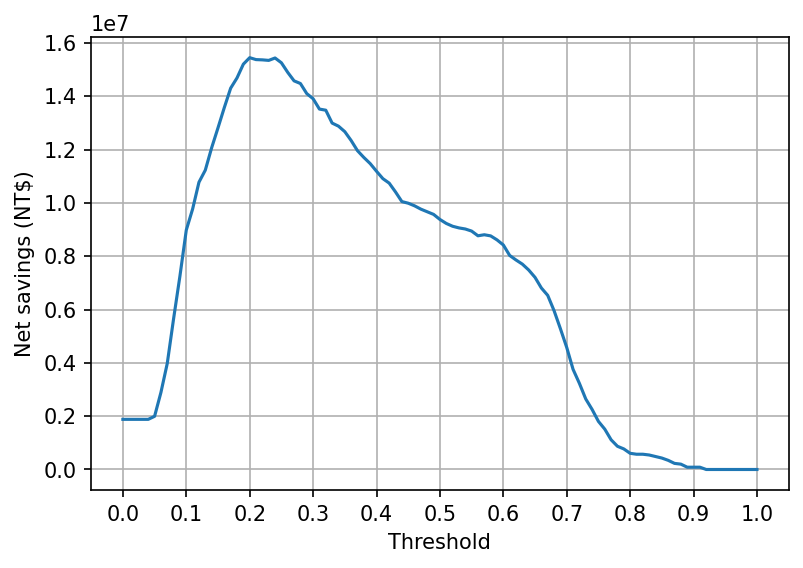

In [145]:
mpl.rcParams['figure.dpi'] = 150
plt.plot(thresholds, net_savings)
plt.xlabel('Threshold')
plt.ylabel('Net savings (NT$)')
plt.xticks(np.linspace(0,1,11))
plt.grid(True)

In [146]:
max_savings_ix = np.argmax(net_savings)

In [147]:
thresholds[max_savings_ix]
# 0.2

0.2

In [148]:
#this is the maximum saving
net_savings[max_savings_ix]
# 15446325.35991916

15446325.35991916

In [149]:
cost_of_all_default = sum(y_test_all) * savings_per_default
cost_of_all_default
#using the test data calculate the cost of all the defaults

66308240.202088244

In [150]:
#Next, calculate by what percent can the cost of defaults be decreased by the counseling program and output you result.

In [151]:
net_savings[max_savings_ix] / cost_of_all_default

0.2329472975431598

In [152]:
#Then, calculate the net savings per account at the optimal threshold and output your result.

In [153]:
net_savings[max_savings_ix] / len(y_test_all)

2601.2673223171373

In [154]:
#net_savings[max_savings_ix] / len(y_test_all)

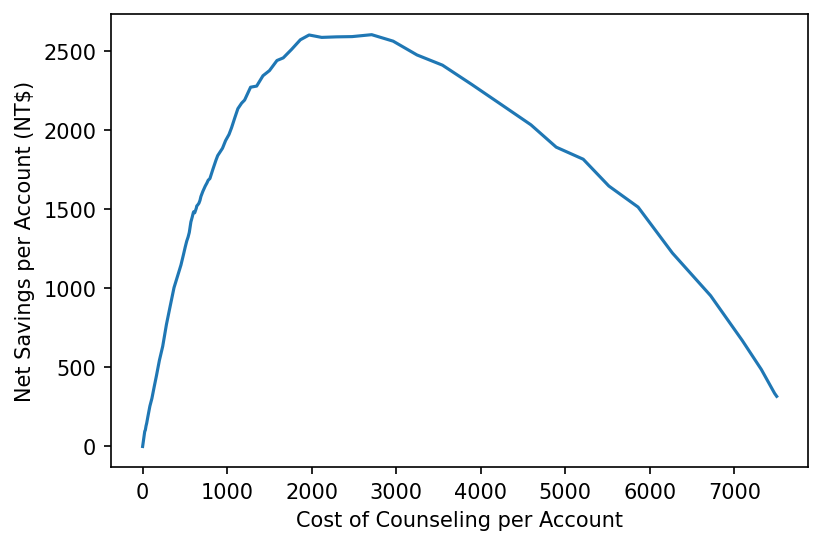

In [155]:
plt.plot(cost_of_all_counselings / len(y_test_all), net_savings / len(y_test_all))
plt.xlabel('Cost of Counseling per Account')
plt.ylabel('Net Savings per Account (NT$)')
plt.show()

In [156]:
#Next, plot the fraction of accounts predicted as positive (this is called the "flag rate") at each threshold.

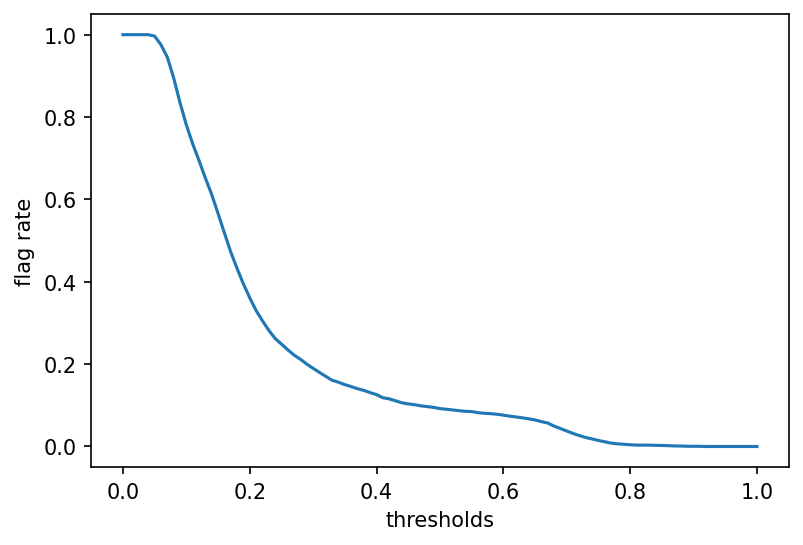

In [157]:
plt.plot(thresholds, n_pos_pred / len(y_test_all))
plt.xlabel('thresholds')
plt.ylabel('flag rate')
plt.show()

In [158]:
#Next, plot a precision-recall curve for the testing data.

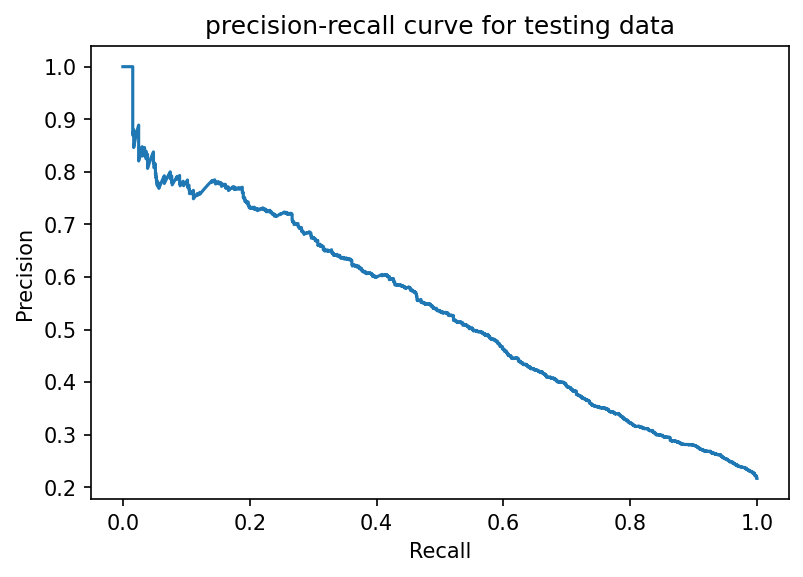

In [159]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test_all, y_test_all_predict_proba[:,1])
plt.plot(recall, precision)
plt.title('precision-recall curve for testing data')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [160]:
#Finally, plot precision and recall separately on the y-axis against threshold on the x-axis

/home/red/my_project1_dir/my_project1_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


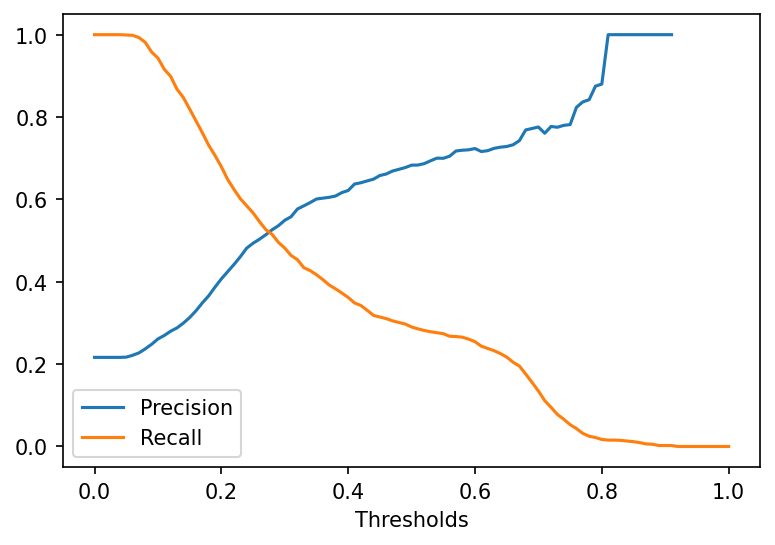

In [161]:
plt.plot(thresholds, np.divide(n_true_pos,n_pos_pred), label="Precision")
plt.plot(thresholds, n_true_pos/sum(y_test_all), label="Recall")
plt.xlabel("Thresholds")
plt.legend()
plt.show()